In [2]:
# Import necessary libraries
import os
import re
import pandas as pd
import geopandas as gpd
import leafmap.foliumap as leafmap
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from zipfile import ZipFile

In [156]:
import geopy 
import geocoder 
import ipywidgets
from folium import plugins 

In [134]:
df = pd.read_csv('data\Education2020.csv')

In [135]:

# Use a list comprehension to find all columns that contain 'Margin of Error'
columns_to_drop = [col for col in df.columns if 'Margin of Error' in col]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df

,Geography,Geographic Area Name,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency),Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",...,Estimate!!Percent Female!!POVERTY RATE FOR THE POPULATION 25 YEARS AND OVER FOR WHOM POVERTY STATUS IS DETERMINED BY EDUCATIONAL ATTAINMENT LEVEL!!Less than high school graduate,Estimate!!Percent Female!!POVERTY RATE FOR THE POPULATION 25 YEARS AND OVER FOR WHOM POVERTY STATUS IS DETERMINED BY EDUCATIONAL ATTAINMENT LEVEL!!High school graduate (includes equivalency),Estimate!!Percent Female!!POVERTY RATE FOR THE POPULATION 25 YEARS AND OVER FOR WHOM POVERTY STATUS IS DETERMINED BY EDUCATIONAL ATTAINMENT LEVEL!!Some college or associate's degree,Estimate!!Percent Female!!POVERTY RATE FOR THE POPULATION 25 YEARS AND OVER FOR WHOM POVERTY STATUS IS DETERMINED BY EDUCATIONAL ATTAINMENT LEVEL!!Bachelor's degree or higher,Estimate!!Percent Female!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings,Estimate!!Percent Female!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings!!Less than high school graduate,Estimate!!Percent Female!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings!!High school graduate (includes equivalency),Estimate!!Percent Female!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings!!Some college or associate's degree,Estimate!!Percent Female!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings!!Bachelor's degree,Estimate!!Percent Female!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings!!Graduate or professional degree
0,0500000US01001,"Autauga County, Alabama",4636,581,1723,1720,612,37860,909,3364,...,37.5,18.4,10.8,5.3,(X),(X),(X),(X),(X),(X)
1,0500000US01003,"Baldwin County, Alabama",15733,2333,5569,6471,1360,155563,3834,10989,...,24.3,12.0,11.5,4.0,(X),(X),(X),(X),(X),(X)
2,0500000US01005,"Barbour County, Alabama",2007,463,875,585,84,17797,1387,3110,...,56.8,28.5,18.6,3.1,(X),(X),(X),(X),(X),(X)
3,0500000US01007,"Bibb County, Alabama",1803,324,1104,351,24,15987,978,2078,...,29.1,23.1,3.7,6.7,(X),(X),(X),(X),(X),(X)
4,0500000US01009,"Blount County, Alabama",4569,645,1833,1964,127,39814,2950,3888,...,26.2,16.8,11.9,3.9,(X),(X),(X),(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,0500000US72145,"Vega Baja Municipio, Puerto Rico",4743,500,1497,2345,401,36640,5919,3764,...,65.2,55.6,42.4,18.0,(X),(X),(X),(X),(X),(X)
3217,0500000US72147,"Vieques Municipio, Puerto Rico",886,99,641,91,55,5998,1186,569,...,41.3,58.7,53.2,11.5,(X),(X),(X),(X),(X),(X)
3218,0500000US72149,"Villalba Municipio, Puerto Rico",2300,163,567,1212,358,15044,2408,832,...,57.4,54.0,46.0,21.0,(X),(X),(X),(X),(X),(X)
3219,0500000US72151,"Yabucoa Municipio, Puerto Rico",3071,175,402,2108,386,23732,4065,2613,...,67.0,59.8,50.1,23.0,(X),(X),(X),(X),(X),(X)


In [146]:
df['County'] = df['Geographic Area Name'].str.split(',').str[0]
df['County'] = df['County'].str.split(' ').str[0]
df['State'] = df['Geographic Area Name'].str.split(',').str[1]

In [147]:
df.State.unique()

array([' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' California',
       ' Colorado', ' Connecticut', ' Delaware', ' District of Columbia',
       ' Florida', ' Georgia', ' Hawaii', ' Idaho', ' Illinois',
       ' Indiana', ' Iowa', ' Kansas', ' Kentucky', ' Louisiana',
       ' Maine', ' Maryland', ' Massachusetts', ' Michigan', ' Minnesota',
       ' Mississippi', ' Missouri', ' Montana', ' Nebraska', ' Nevada',
       ' New Hampshire', ' New Jersey', ' New Mexico', ' New York',
       ' North Carolina', ' North Dakota', ' Ohio', ' Oklahoma',
       ' Oregon', ' Pennsylvania', ' Rhode Island', ' South Carolina',
       ' South Dakota', ' Tennessee', ' Texas', ' Utah', ' Vermont',
       ' Virginia', ' Washington', ' West Virginia', ' Wisconsin',
       ' Wyoming', ' Puerto Rico'], dtype=object)

In [148]:
df = df[(df['State']!=' Alaska')|(df['State']!=' Puerto Rico')]

In [149]:
df['precent highschool graduate'] = df['Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)']/df['Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years']

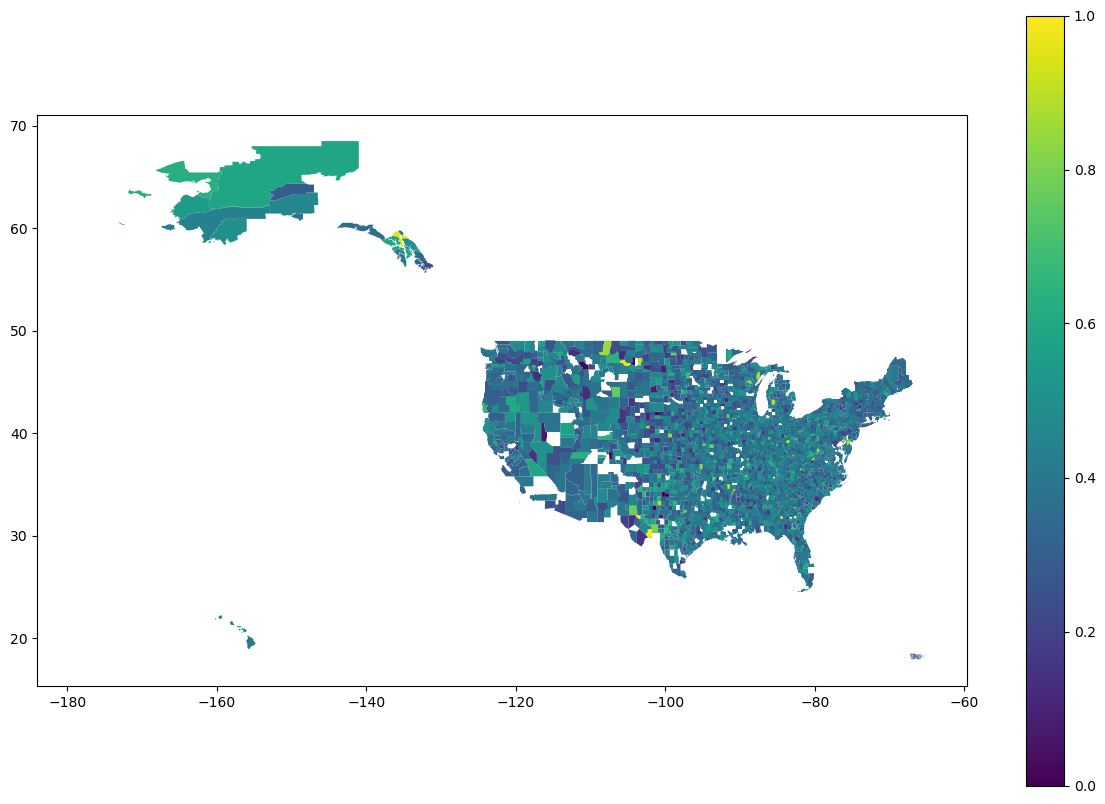

In [151]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
gdf = gpd.read_file('shapefiles\cb_2018_us_county_500k.shp')
gdf

# Ensure that the 'County' column in your df matches the shapefile's county names
# df['County'] = df['County'].apply(lambda x: x.split(' County')[0])

# Merge your data with the geodataframe
merged_gdf = gdf.merge(df, left_on='NAME', right_on='County')


# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='precent highschool graduate', ax=ax, legend=True)

# Show the map
plt.show()
